In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot

## Data Loading:

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Descriptive Statistics: 

In [5]:
df.describe() #Display statistical information of date

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

## Checking for null & duplicated values:

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [8]:
df.duplicated().sum()

0

## EDA (Expodatary Data Analysis):

In [9]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [10]:
df= df[df['job']!='unknown']

In [11]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

In [12]:
df.contact.value_counts()

cellular     7993
unknown      2336
telephone     763
Name: contact, dtype: int64

In [13]:
df = df[df['contact']!='unknown']

In [14]:
df.contact.value_counts()

cellular     7993
telephone     763
Name: contact, dtype: int64

In [15]:
df.poutcome.value_counts()

unknown    5958
failure    1214
success    1055
other       529
Name: poutcome, dtype: int64

In [16]:
df = df[df['poutcome']!='unknown']

In [17]:
df.poutcome.value_counts()

failure    1214
success    1055
other       529
Name: poutcome, dtype: int64

## Data visualization:

In [18]:
plt.figure(figsize=(10,4))
fig = px.histogram(df, df['age'], nbins=10, labels={"value" :"Ages"}, title="Distribution of Ages", text_auto=True, color="marital")
iplot(fig)

<Figure size 1000x400 with 0 Axes>

In [19]:
age_job = pd.pivot_table(df, values='age', index='job', aggfunc='mean')
print(age_job)

                     age
job                     
admin.         39.808290
blue-collar    38.880109
entrepreneur   42.905660
housemaid      49.115385
management     40.524272
retired        68.151639
self-employed  39.846939
services       38.644330
student        26.300699
technician     39.395034
unemployed     40.917526


<Figure size 1000x400 with 0 Axes>

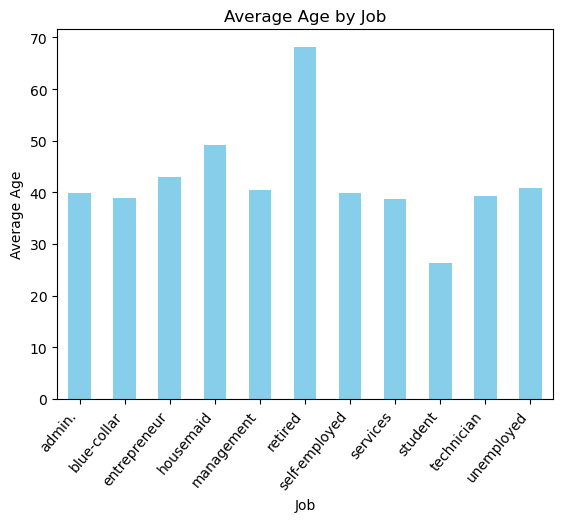

In [20]:
plt.figure(figsize=(10,4))
ax = age_job.plot(kind='bar', legend=False, color='skyblue')
plt.title('Average Age by Job')
plt.xlabel('Job')
plt.ylabel('Average Age')
plt.xticks(rotation=50, ha='right')
plt.show();

In [21]:
df.education.value_counts()

secondary    1340
tertiary     1056
primary       279
unknown       123
Name: education, dtype: int64

In [22]:
df=df[df['education']!='unknown']

In [23]:
df.education.value_counts()

secondary    1340
tertiary     1056
primary       279
Name: education, dtype: int64

In [24]:
pd.crosstab(df.job, columns=df.education, values=df.age, aggfunc='mean').round(0)

education      primary  secondary  tertiary
job                                        
admin.            51.0       40.0      34.0
blue-collar       43.0       37.0      33.0
entrepreneur      53.0       41.0      42.0
housemaid         57.0       45.0      41.0
management        49.0       44.0      39.0
retired           71.0       66.0      66.0
self-employed     46.0       41.0      39.0
services          42.0       38.0      40.0
student           21.0       26.0      28.0
technician        51.0       40.0      37.0
unemployed        38.0       44.0      36.0

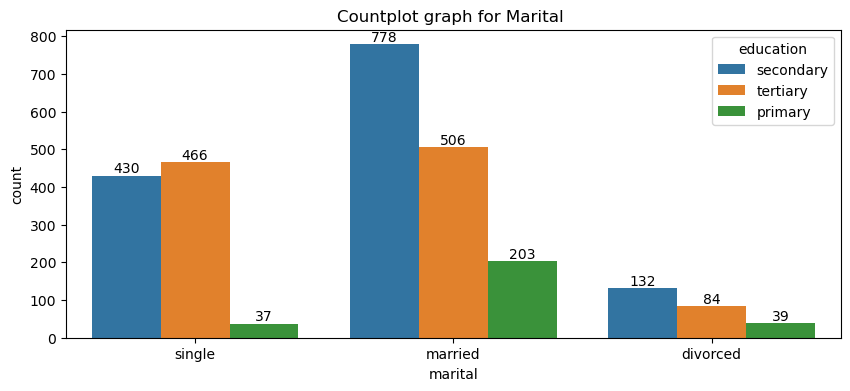

In [25]:
fig, ax = plt.subplots(figsize=(10, 4))  
ax = sns.countplot(x='marital', hue='education', data=df)
plt.title(f'Countplot graph for Marital ')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]) 
ax.bar_label(ax.containers[2]) 
plt.show();

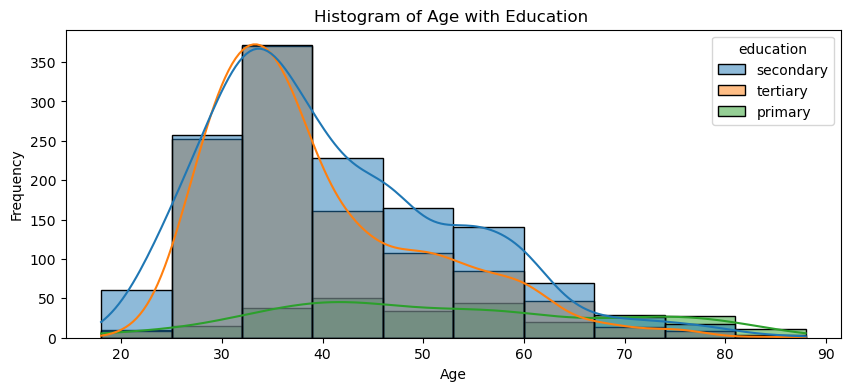

In [26]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x=df.age, hue=df.education, bins=10, kde=True, color='skyblue')
plt.title('Histogram of Age with Education ')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show();

In [27]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [28]:
df.default.value_counts()

no     2665
yes      10
Name: default, dtype: int64

<Axes: ylabel='default'>

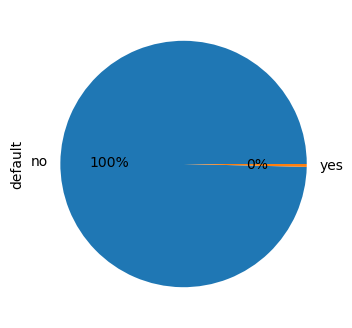

In [29]:
plt.figure(figsize=(10,4))
df.default.value_counts().plot(kind='pie', autopct='%1.0f%%')

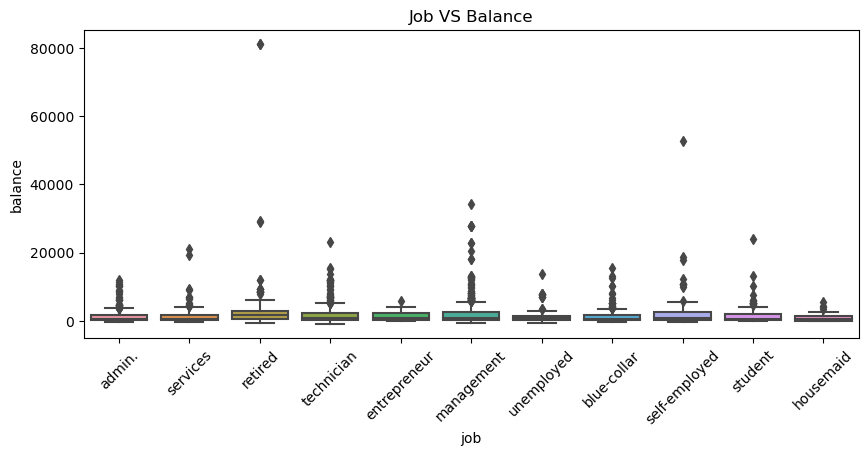

In [30]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x=df.job, y=df.balance)
plt.title('Job VS Balance')
plt.xticks(rotation=45)
plt.show()

In [31]:
df[df['balance']==df.balance.max()] #show maximam balance

age      job  marital  education default  balance housing loan  \
3043   84  retired  married  secondary      no    81204      no   no   
3380   84  retired  married  secondary      no    81204      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
3043  telephone   28   dec       679         1    313         2    other   
3380  telephone    1   apr       390         1     94         3  success   

     deposit  
3043     yes  
3380     yes

In [32]:
df[df['balance']==df.balance.min()] #show minimam balance

age         job  marital  education default  balance housing loan  \
9290   48  technician  married  secondary      no     -938     yes   no   

       contact  day month  duration  campaign  pdays  previous poutcome  \
9290  cellular    7   may       134         1    344         2  failure   

     deposit  
9290      no

In [33]:
df[df.balance>0] #show where balance is greater then 0

age           job   marital  education default  balance housing loan  \
891     33      services   married  secondary      no     3444     yes   no   
951     53       retired   married   tertiary      no     2269      no   no   
952     37    technician   married  secondary      no     5115     yes   no   
953     45  entrepreneur   married  secondary      no      781      no  yes   
961     34    management    single   tertiary      no     1494     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
11098   46    management   married  secondary      no       21     yes   no   
11104   30   blue-collar    single  secondary      no      971     yes   no   
11125   40   blue-collar  divorced    primary      no       54     yes   no   
11133   37    management   married   tertiary      no     1594     yes   no   
11155   35   blue-collar   married  secondary      no       80     yes  yes   

         contact  day month  duration  campaign  pdays  previous poutcome  \
891    telephone   21   oct       144         1     91         4  failure   
951     cellular   17   nov      1091         2    150         1  success   
952     cellular   17   nov      1210         2    171         4  failure   
953     cellular   17   nov       652         2    126         2  failure   
961     cellular   18   nov       596         1    182         1    other   
...          ...  ...   ...       ...       ...    ...       ...      ...   
11098   cellular    7   may       124         1    338         2  failure   
11104   cellular   17   apr       283         1    317         2    other   
11125   cellular   13   may        10         5    362         3    other   
11133   cellular   17   apr       110         1    260         5  failure   
11155   cellular   21   nov        38         2    172         2  failure   

      deposit  
891       yes  
951       yes  
952       yes  
953       yes  
961       yes  
...       ...  
11098      no  
11104      no  
11125      no  
11133      no  
11155      no  

[2446 rows x 17 columns]

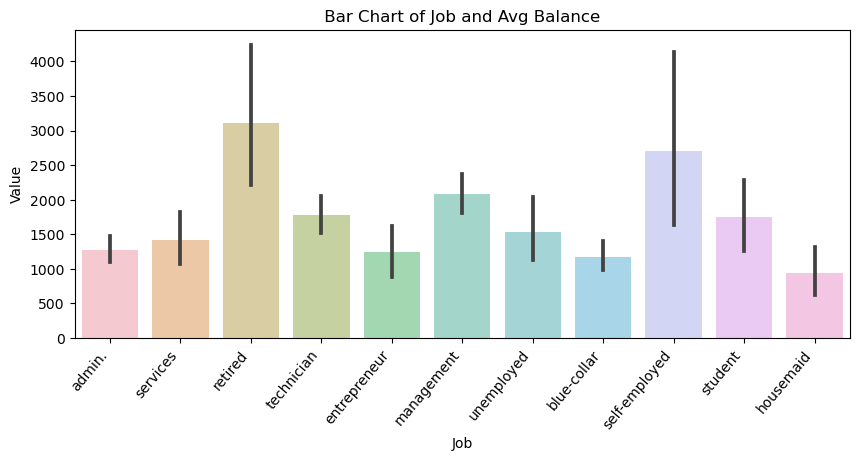

In [34]:
plt.figure(figsize=(10, 4))
sns.barplot(x='job', y='balance', data=df, alpha=0.5)
plt.title(' Bar Chart of Job and Avg Balance ')
plt.xlabel('Job')
plt.ylabel('Value')
plt.xticks(rotation=50, ha='right')
plt.show();

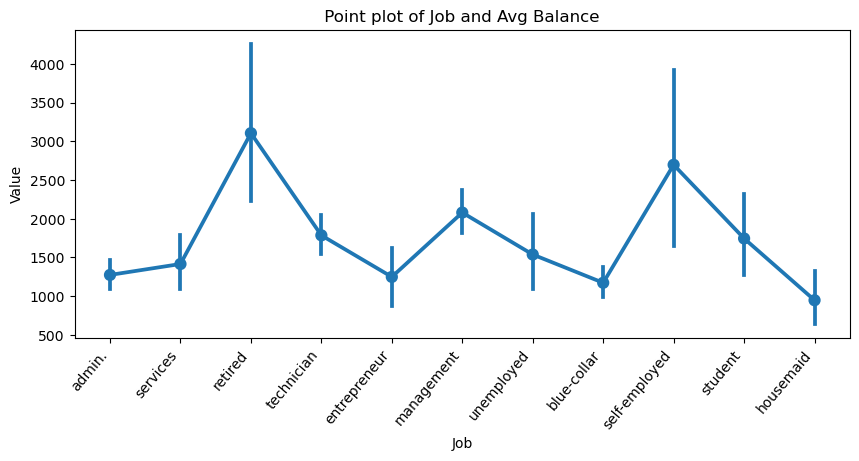

In [35]:
plt.figure(figsize=(10, 4))
sns.pointplot(x='job', y='balance', data=df)
plt.title(' Point plot of Job and Avg Balance ')
plt.xlabel('Job')
plt.ylabel('Value')
plt.xticks(rotation=50, ha='right')
plt.show()

In [36]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [37]:
df.housing.value_counts()

no     1448
yes    1227
Name: housing, dtype: int64

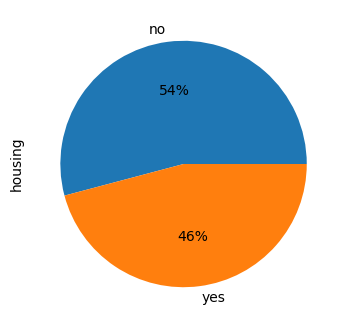

In [38]:
plt.figure(figsize=(10,4))
df.housing.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show();

In [39]:
df.loan.unique()

array(['yes', 'no'], dtype=object)

In [40]:
df.loan.value_counts()

no     2412
yes     263
Name: loan, dtype: int64

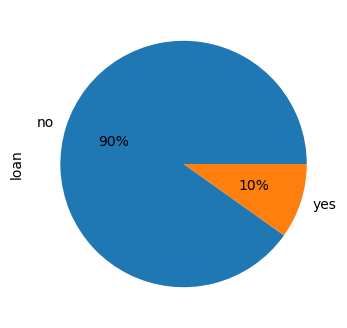

In [41]:
plt.figure(figsize=(10,4))
df.loan.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show();

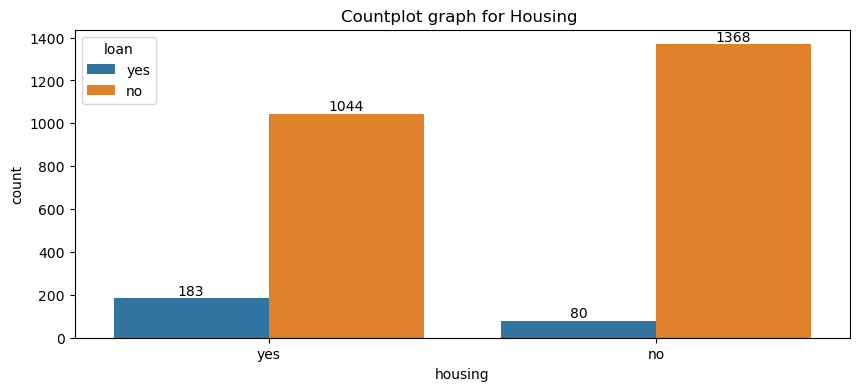

In [42]:
fig, ax = plt.subplots(figsize=(10, 4))  
ax = sns.countplot(x='housing', hue='loan', data=df)
plt.title(f'Countplot graph for Housing ')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]) 
plt.show();

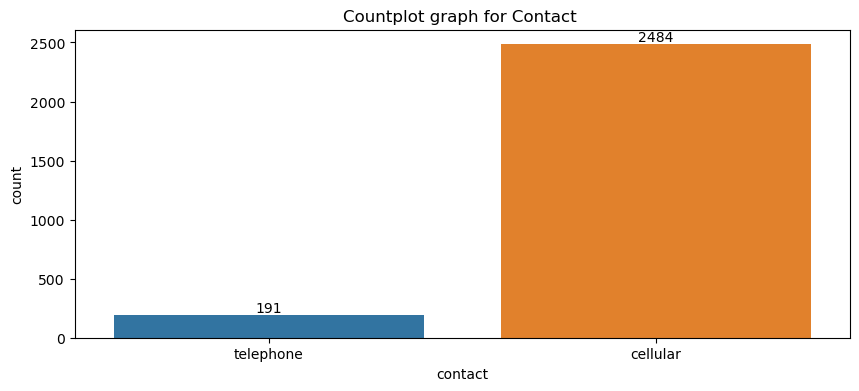

In [43]:
fig, ax = plt.subplots(figsize=(10, 4))  
ax = sns.countplot(x='contact',  data=df)
plt.title(f'Countplot graph for Contact ')
ax.bar_label(ax.containers[0])
plt.show();

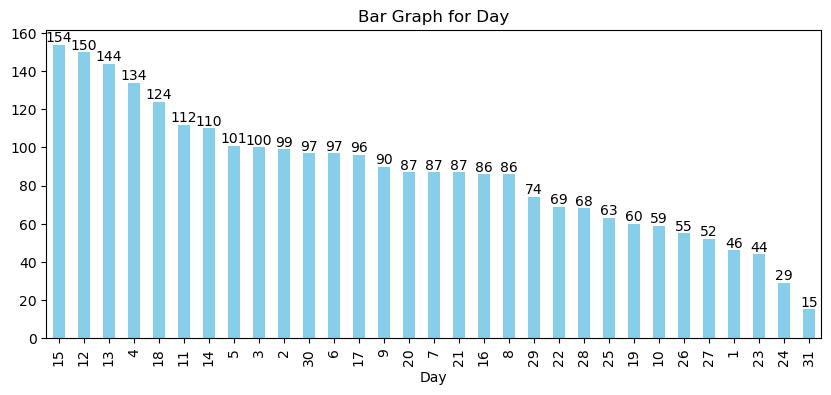

In [44]:
fig, ax = plt.subplots(figsize=(10,4))
ax = df.day.value_counts().plot(kind='bar', color='skyblue')
ax.bar_label(ax.containers[0])
plt.title('Bar Graph for Day')
plt.xlabel('Day')
plt.show();



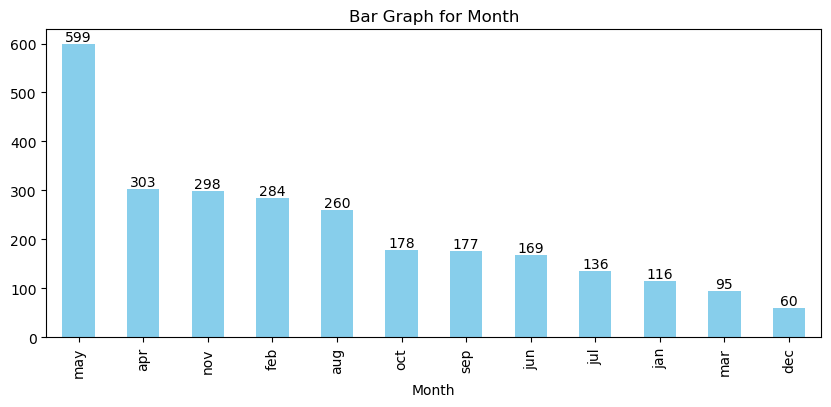

In [45]:
fig, ax = plt.subplots(figsize=(10,4))
ax = df.month.value_counts().plot(kind='bar', color='skyblue')
ax.bar_label(ax.containers[0])
plt.title('Bar Graph for Month')
plt.xlabel('Month')
plt.show();


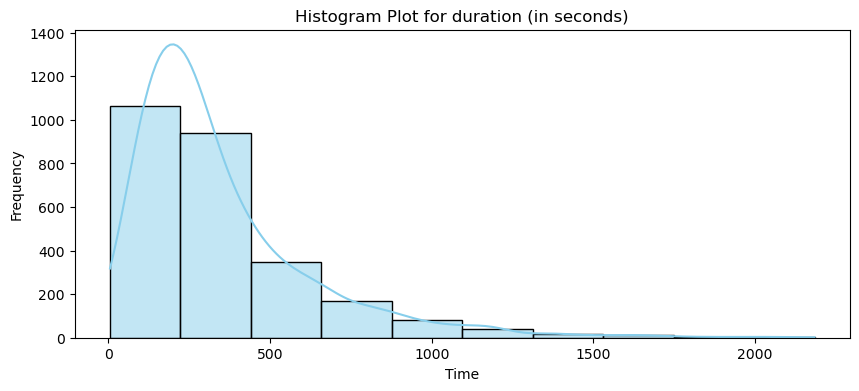

In [46]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x=df.duration, bins=10, kde=True,color='skyblue')
plt.title('Histogram Plot for duration (in seconds)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show();

In [52]:
df.campaign.value_counts()

1     1379
2      731
3      303
4      125
5       65
6       37
7       13
8       13
9        7
11       1
12       1
Name: campaign, dtype: int64

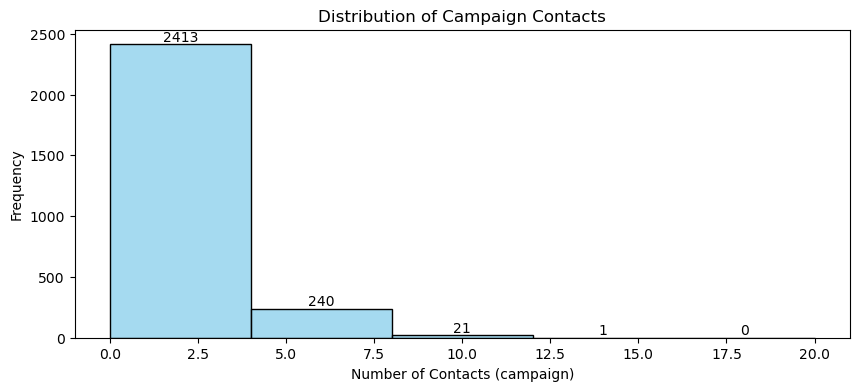

In [55]:
plt.figure(figsize=(10, 4))
ax= sns.histplot(data=df,x=df.campaign,bins=5,binrange=(0,20),color='skyblue')
plt.title('Distribution of Campaign Contacts')
plt.xlabel('Number of Contacts (campaign)')
plt.ylabel('Frequency')
ax.bar_label(ax.containers[0])
plt.show();

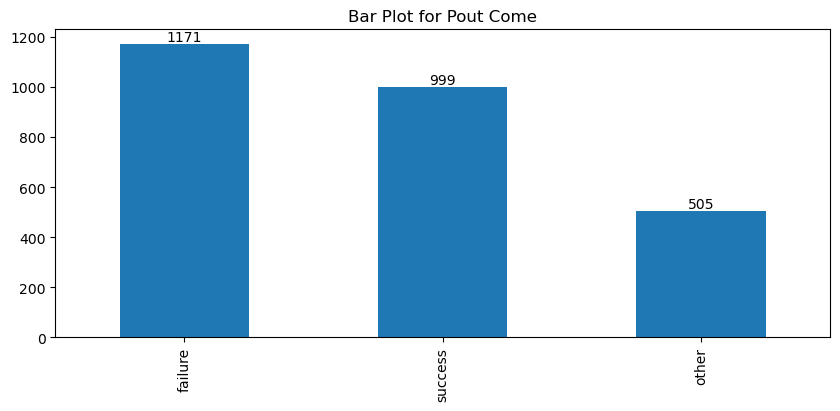

In [56]:
plt.figure(figsize=(10, 4))
ax = df.poutcome.value_counts().plot(kind='bar')
plt.title('Bar Plot for Pout Come')
ax.bar_label(ax.containers[0])
plt.show();

In [61]:
df.pdays.unique()

array([166,  91, 150, 171, 126, 182, 110, 198, 174, 175,  27, 128, 100,
       177, 167, 122, 183, 195, 133, 178,  34,  10, 163, 184, 154,  99,
         2, 242, 272,  76, 160,  90, 196, 246, 238, 203, 268, 189,  92,
         9,  88,  85,  93, 210, 257, 270, 106, 199, 112,  41, 294, 231,
       239, 302, 135, 222, 138, 323, 141, 267, 320, 264, 316, 315, 256,
       146, 328,  74, 148, 327, 341, 145, 147, 234, 345, 318, 325, 274,
       343, 260, 305, 344, 254, 180,  82, 181, 278, 153,   4, 261, 349,
       334, 176,  87, 269,  86, 169,  83,  79,   6, 259,  13, 350,  84,
        80, 164,  22, 296,  66, 263, 333,  17,  89,  78, 286, 337, 364,
       188, 342, 363, 170, 352, 295, 353, 356, 288, 367, 366, 359, 347,
       370, 284, 300, 306, 361, 287, 301, 355, 371, 292, 360, 358, 346,
       357, 368, 340, 312, 179, 329, 298, 372, 374, 375, 266, 291,  95,
       109,  94,  98, 186, 101, 187, 321,  40,  96,  21,  35,  97, 285,
       103, 212, 293,  81,  38,  28,  67,  60, 120,  55, 113,  7

In [60]:
df['pdays'] = df['pdays'].replace(-1, 0)
print(df.pdays.min())
print(df.pdays.max())

1
854


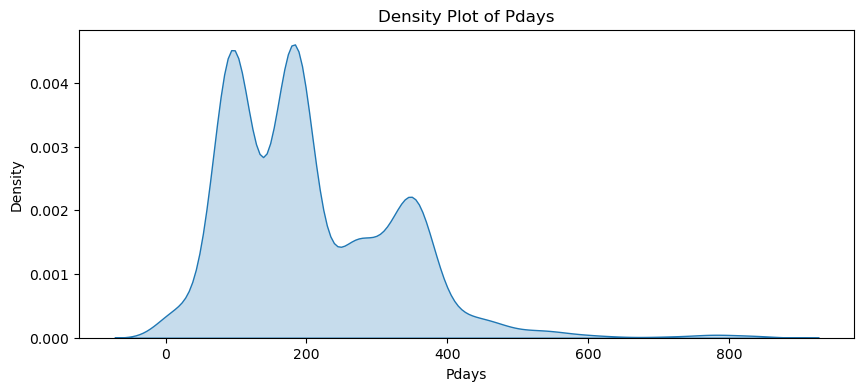

In [62]:
plt.figure(figsize=(10, 4))
sns.kdeplot(data=df, x=df.pdays, fill=True)
plt.title(f'Density Plot of Pdays')
plt.xlabel("Pdays")
plt.ylabel('Density')
plt.show()

In [63]:
df.previous.unique()

array([ 1,  4,  2,  3, 10,  7,  9,  5, 29,  6, 13, 17,  8, 11, 30, 22, 58,
       21, 14, 26, 12, 19, 55, 23, 15, 20, 27, 16, 40, 28, 18, 37],
      dtype=int64)

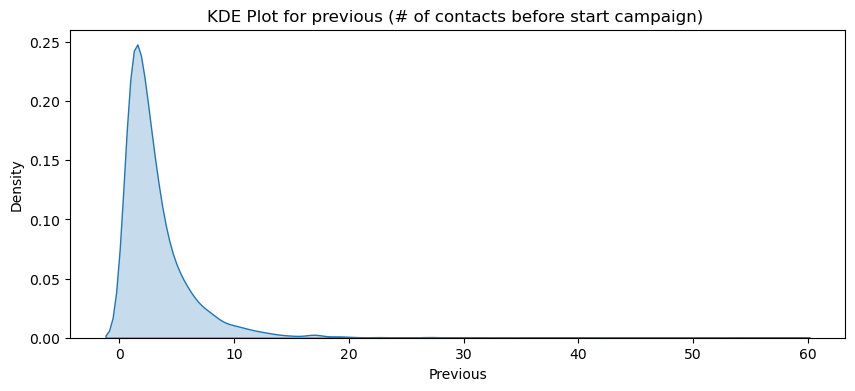

In [66]:
plt.figure(figsize=(10, 4))
sns.kdeplot(data=df, x=df.previous,fill=True)
plt.title(f'KDE Plot for previous (# of contacts before start campaign) ')
plt.xlabel("Previous")
plt.ylabel('Density')
plt.show()

## Correlation between Features: 

C:\Users\Sajid Mehar\AppData\Local\Temp\ipykernel_2188\4294139745.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



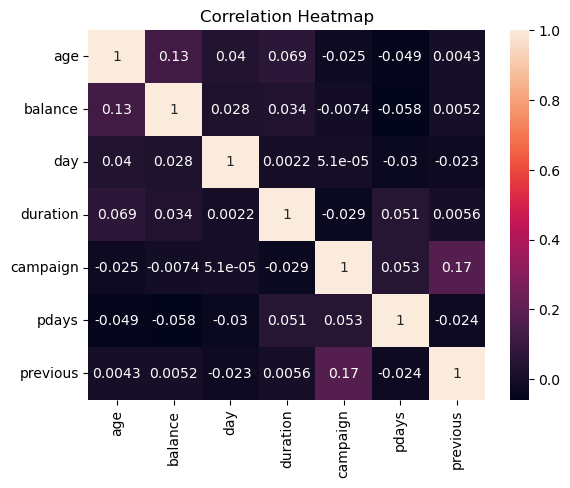

In [48]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show();

## Plot PairPlot:

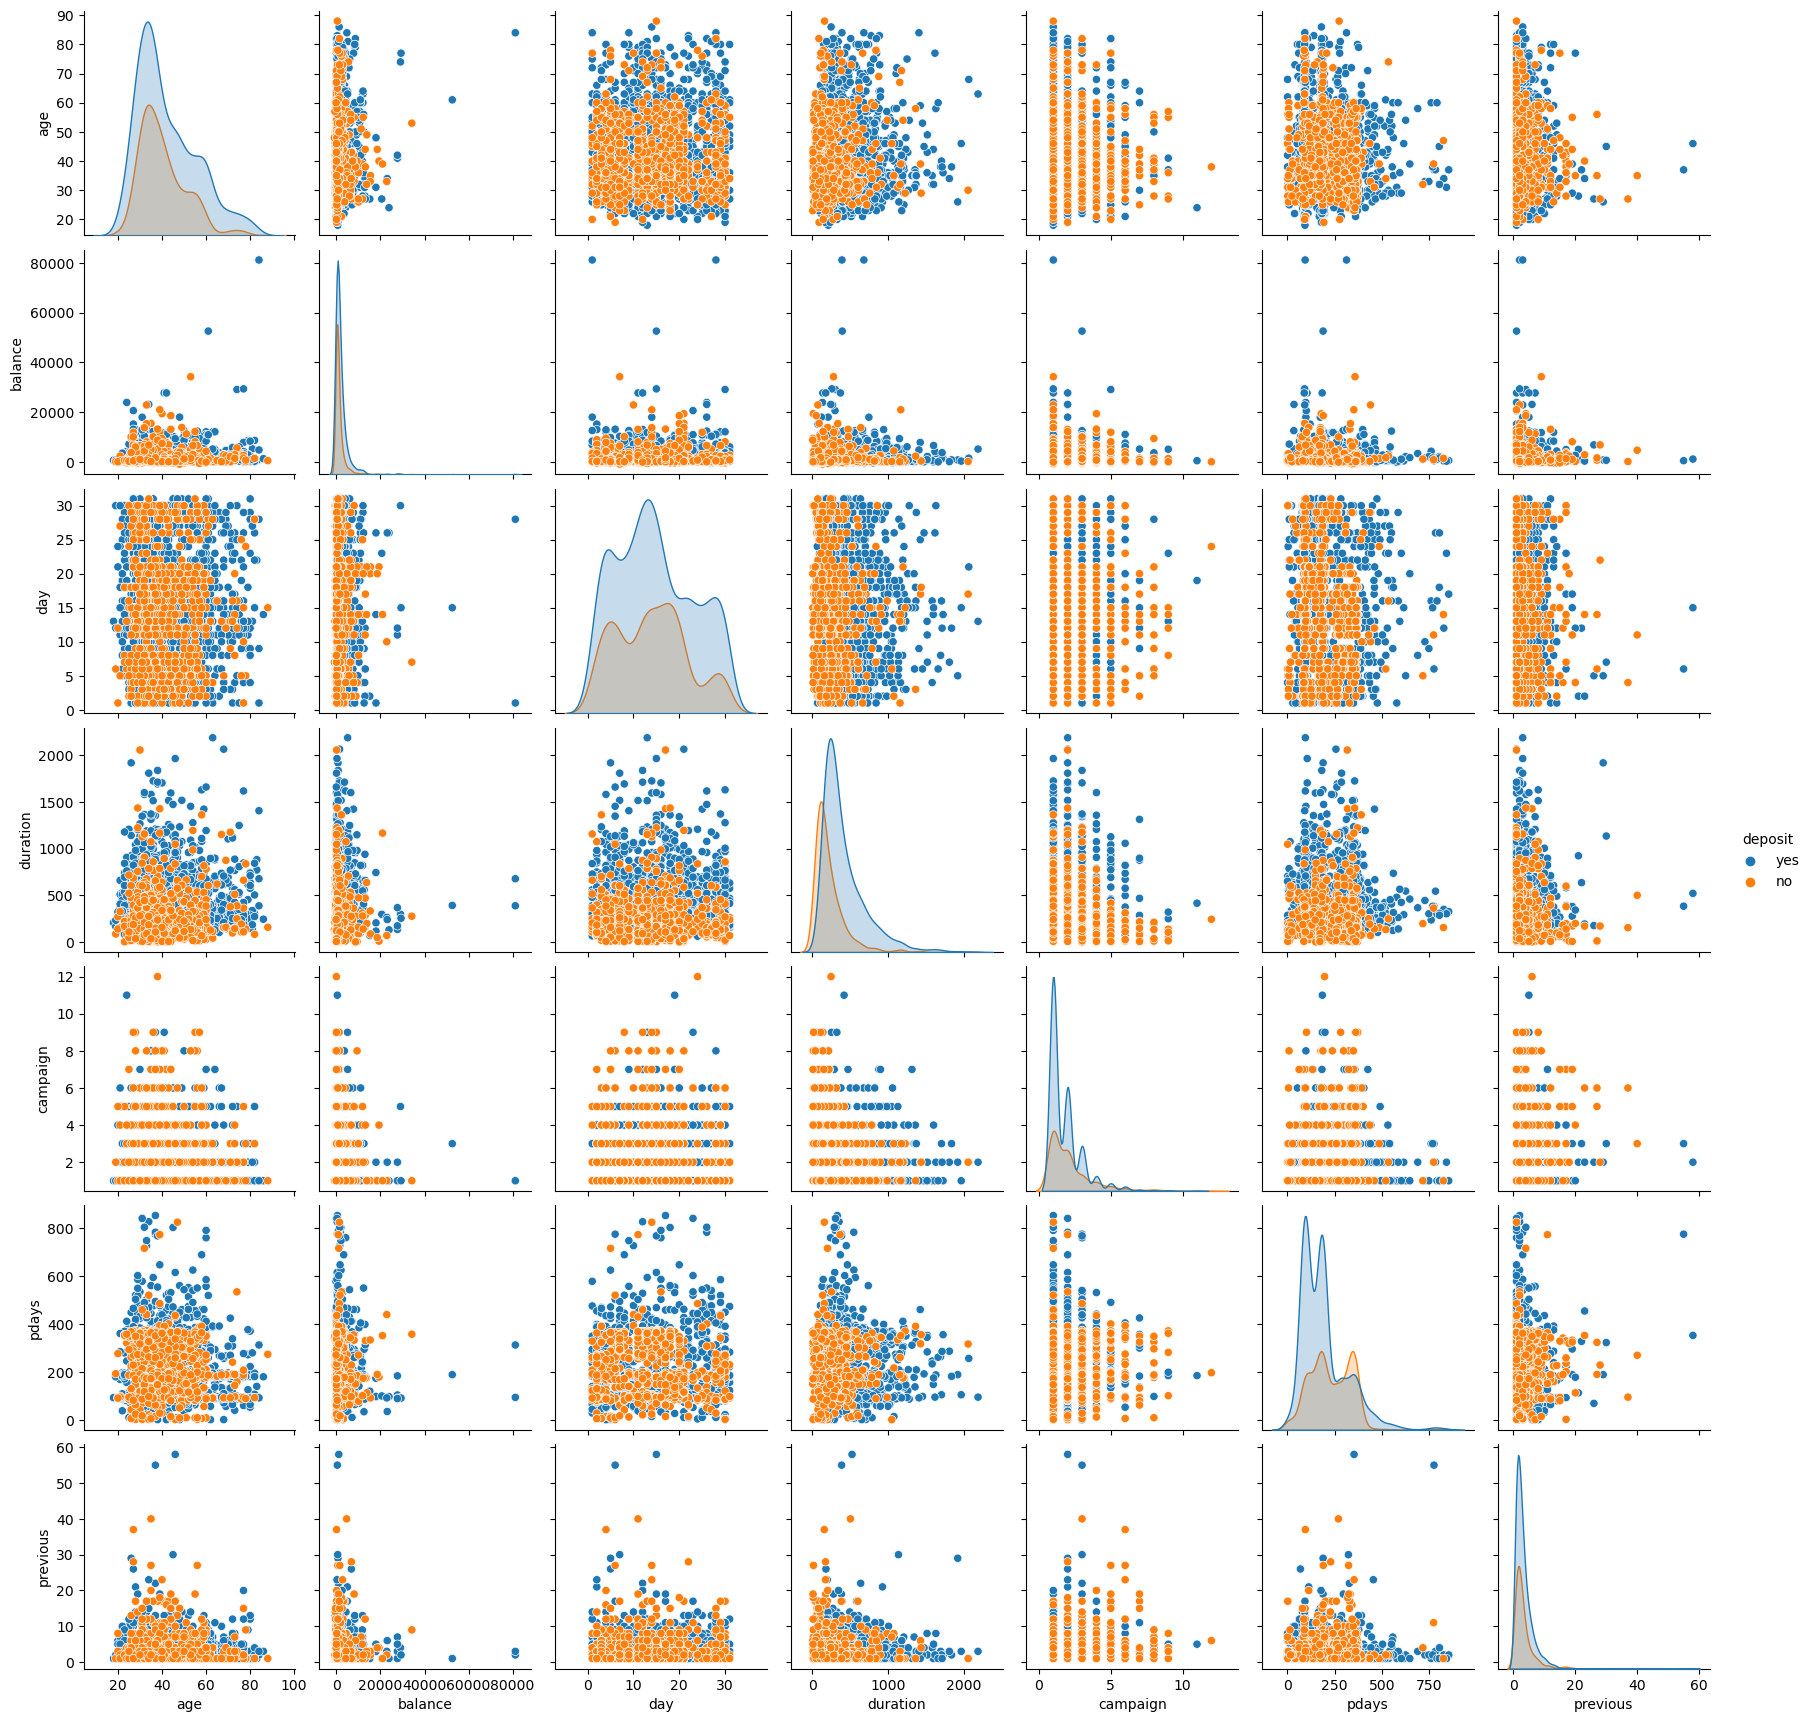

In [51]:
#show all the relation and the correlation beetween features
sns.pairplot(df,hue='deposit')
plt.show();

## Feature Engineering:

In [67]:
#Fatch Non Numeric (Categorical) Columns 
non_numeric_cols=[]
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        pass
    else:
        non_numeric_cols.append(col)

In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [69]:
for col in non_numeric_cols:
    df[col]=le.fit_transform(df[col])
df.head(10)

age  job  marital  education  default  balance  housing  loan  contact  \
890   42    0        2          1        0     -247        1     1        1   
891   33    7        1          1        0     3444        1     0        1   
951   53    5        1          2        0     2269        0     0        0   
952   37    9        1          1        0     5115        1     0        0   
953   45    2        1          1        0      781        0     1        0   
961   34    4        2          2        0     1494        1     0        0   
968   46    4        1          2        0        0        0     0        0   
977   43    4        1          2        0     1429        1     0        0   
982   33    9        2          2        0      149        1     0        0   
985   46   10        0          1        0     3354        1     0        0   

     day  month  duration  campaign  pdays  previous  poutcome  deposit  
890   21     10       519         1    166         1         1        1  
891   21     10       144         1     91         4         0        1  
951   17      9      1091         2    150         1         2        1  
952   17      9      1210         2    171         4         0        1  
953   17      9       652         2    126         2         0        1  
961   18      9       596         1    182         1         1        1  
968   18      9       716         2    110         3         1        1  
977   19      9      1015         1    198         2         1        1  
982   19      9       424         2    182         1         1        1  
985   19      9       522         1    174         1         2        1

## Create X (predictor ) and y (target) variable:

In [72]:
X= df.drop('deposit', axis=True)
y=df['deposit']

In [73]:
X

age  job  marital  education  default  balance  housing  loan  contact  \
890     42    0        2          1        0     -247        1     1        1   
891     33    7        1          1        0     3444        1     0        1   
951     53    5        1          2        0     2269        0     0        0   
952     37    9        1          1        0     5115        1     0        0   
953     45    2        1          1        0      781        0     1        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11125   40    1        0          0        0       54        1     0        0   
11133   37    4        1          2        0     1594        1     0        0   
11145   60    5        0          2        0     -134        0     0        0   
11155   35    1        1          1        0       80        1     1        0   
11160   43    9        1          1        0        0        0     1        0   

       day  month  duration  campaign  pdays  previous  poutcome  
890     21     10       519         1    166         1         1  
891     21     10       144         1     91         4         0  
951     17      9      1091         2    150         1         2  
952     17      9      1210         2    171         4         0  
953     17      9       652         2    126         2         0  
...    ...    ...       ...       ...    ...       ...       ...  
11125   13      8        10         5    362         3         1  
11133   17      0       110         1    260         5         0  
11145   12      8       243         1    271         4         0  
11155   21      9        38         2    172         2         0  
11160    8      8         9         2    172         5         0  

[2675 rows x 16 columns]

In [74]:
y

890      1
891      1
951      1
952      1
953      1
        ..
11125    0
11133    0
11145    0
11155    0
11160    0
Name: deposit, Length: 2675, dtype: int32

## Split the data into test and train:

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Model Building:

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [77]:
dtree=DecisionTreeClassifier()

In [79]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
y_pred = dtree.predict(X_test)

In [81]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[124,  59],
       [ 68, 284]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

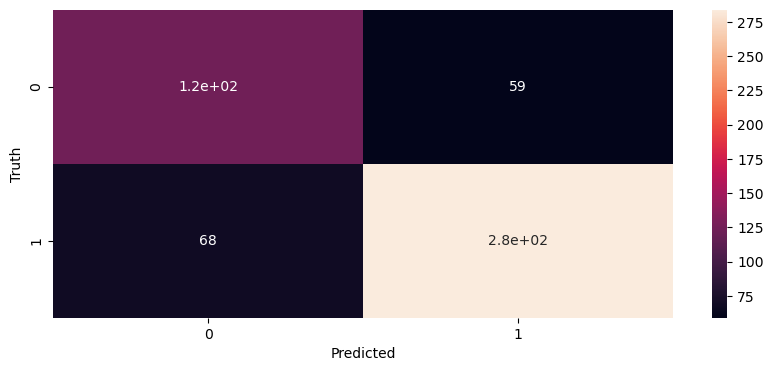

In [83]:
plt.figure(figsize=(10,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [85]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66       183
           1       0.83      0.81      0.82       352

    accuracy                           0.76       535
   macro avg       0.74      0.74      0.74       535
weighted avg       0.77      0.76      0.76       535

0.7626168224299066


## Let us visualize the Decision Tree to understand it better:

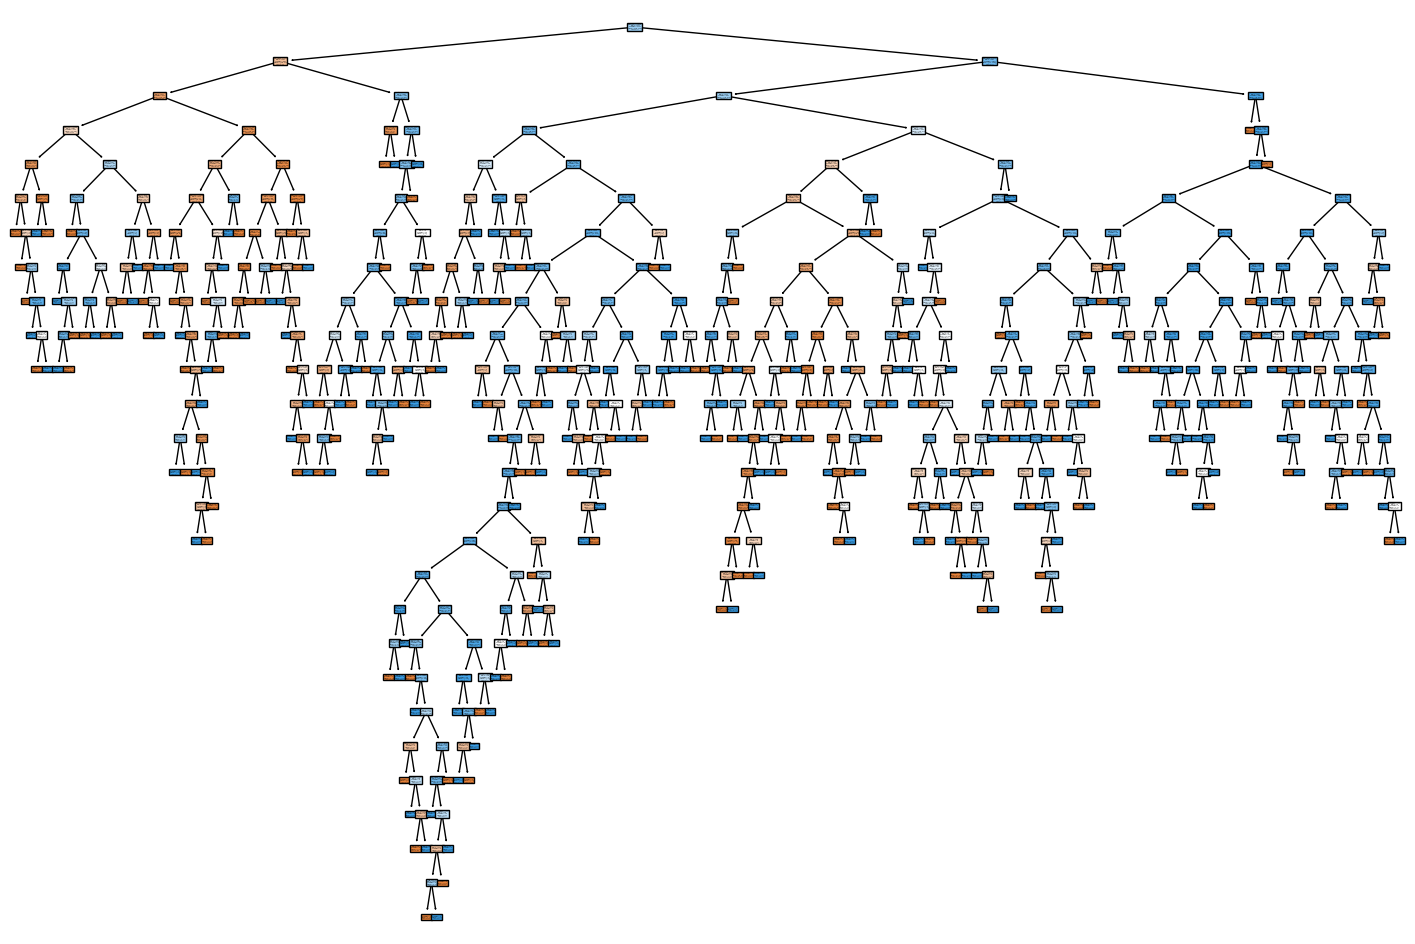

In [92]:
from sklearn.tree import plot_tree 
fig, ax = plt.subplots(figsize=(18,12))
df1 = pd.read_csv('bank.csv')
plot_tree(dtree, feature_names=list(X.columns), class_names=list(df1['deposit'].unique()), filled=True)
plt.show();

## Applying XGBoost for Deposit Prediction:

In [95]:
import xgboost as xgboost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [96]:
xgb_model.score(X_train, y_train)

1.0

In [97]:
xgb_model.score(X_test, y_test)

0.8467289719626169

In [98]:
xgb_y_pred=xgb_model.predict(X_test)

In [99]:
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
xgb_cm

array([[138,  45],
       [ 37, 315]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

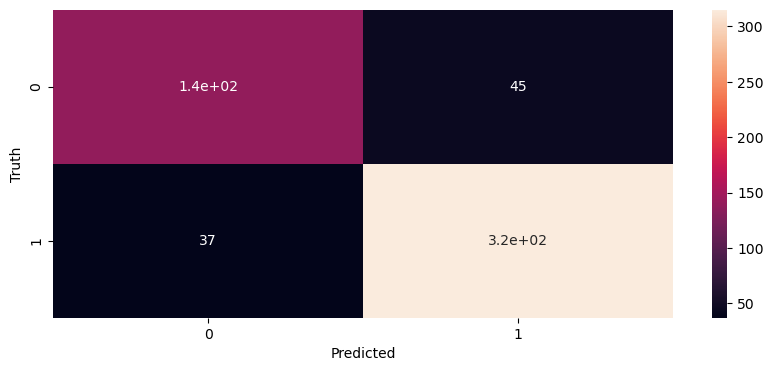

In [100]:
plt.figure(figsize=(10,4))
sns.heatmap(xgb_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [101]:
print(classification_report(y_test, xgb_y_pred))
print(accuracy_score(y_test,xgb_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       183
           1       0.88      0.89      0.88       352

    accuracy                           0.85       535
   macro avg       0.83      0.82      0.83       535
weighted avg       0.85      0.85      0.85       535

0.8467289719626169
